## PROJET FIL ROUGE

In [1]:
# import des librairies
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
path = '/home/....../Bureau/PFL'

In [7]:
t0 = time.time()
print("Temps de l'import de l'échantillon test et d'apprentissage :")
filename_train = 'train.csv'
filename_test = 'test.csv'

data_train = pd.read_csv(path+'/'+filename_train)
#data_test = pd.read_csv(path+'/'+filename_test)

print("%0.3fs" % (time.time() - t0))

Temps de l'import de l'échantillon test et d'apprentissage :
23.854s


In [6]:
print("Statistiques sur les chansons :")
print("Nombre de chansons uniques dans train : " + str(data_train['song_id'].nunique()))
print("Nombre de chansons uniques dans test : " + str(data_test['song_id'].nunique()))
merge_train_et_test = np.intersect1d(data_train['song_id'].unique(), data_test['song_id'].unique())

print("Chansons uniques présentes dans Train et Test : {}" .format(merge_train_et_test.shape[0]))
print(round((data_test['song_id'].nunique()- merge_train_et_test.shape[0])/data_test['song_id'].nunique(),4))



Statistiques sur les chansons :
Nombre de chansons uniques dans train : 359966
Nombre de chansons uniques dans test : 224753
Chansons uniques présentes dans Train et Test : 164880
0.2664


Il existe 26.64% de chansons uniques dans Test et non présentes dans le jeu d'apprentissage

### SONGS

In [2]:
songs = pd.read_csv(path+'/'+'songs.csv')
print('Nombre de chansons : {}'.format(songs['song_id'].nunique()))
songs.head(5)

Nombre de chansons : 2296320


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [3]:
min_song_length_sec = songs['song_length'].min() / 1000  # durée en milisecondes
max_song_length_sec = songs['song_length'].max() / 1000
print('Durée de la plus courte chanson : {}'.format(min_song_length_sec))
print('Durée de la plus longue chanson : {}'.format(max_song_length_sec))

Durée de la plus courte chanson : 0.185
Durée de la plus longue chanson : 12173.85


In [4]:
min_length_song = songs.iloc[songs['song_length'].idxmin()]
max_length_song = songs.iloc[songs['song_length'].idxmax()]
print(min_length_song)
print('=============================================================')
print(max_length_song)

song_id        kLdsd0eUT6Pp3EDG4nEGBxabSN5b9CUSuaE3H/B5w78=
song_length                                             185
genre_ids                                               921
artist_name                       Blockbuster Sound Effects
composer                                                NaN
lyricist                                                NaN
language                                                 52
Name: 677186, dtype: object
song_id        DCdid/1HvuvKitGXNUg+R89Z9T7bHQquDeUra4fBzZU=
song_length                                        12173850
genre_ids                                               940
artist_name                                Jason Stephenson
composer                                   Jason Stephenson
lyricist                                                NaN
language                                                 -1
Name: 778210, dtype: object


In [5]:
print('Langues : {}'.format(songs['language'].unique()))
print('Nombre de langues : {}'.format(songs['language'].unique().shape[0]))

Langues : [ 3. 31. 52. 17. 10. -1. 24. 59. 45. 38. nan]
Nombre de langues : 11


### Etude de la popularité des chansons

Dans cette étape, on croise le jeu de données d'apprentissage et la table des chansons.
L'idée est de classer les chansons selon leur popularité mais aussi d'étudier les variables qui influent à la répétition ou non des chansons.

In [8]:
log_chansons = data_train[['msno','song_id','target']].merge(songs,on='song_id')
log_chansons_g = log_chansons[['song_id', 'target']].groupby(['song_id']).agg(['mean','count'])

In [9]:
log_chansons_g.reset_index(inplace=True)
log_chansons_g.columns = list(map(''.join, log_chansons_g.columns.values))
log_chansons_g.columns = ['song_id', 'chance_replay', 'occurence']
song_data = log_chansons_g.merge(songs, on='song_id')

#### Le nombre maximal d'occurence

In [10]:
song_data['occurence'].max()

13973

In [11]:
song_data.head(3)

,song_id,chance_replay,occurence,song_length,genre_ids,artist_name,composer,lyricist,language
0,+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ=,0,1,223921,921,รวมศิลปิน,Chackkrit Muckkanaso,Tadakorn; Narongvit Techatanawat,45
1,++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=,0,2,271302,465,Variété Française,NaN,NaN,52
2,++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,0,3,221413,786|947,愛的音樂盒,NaN,NaN,-1


In [12]:
type('genre_ids')

str

In [14]:
# Fonction qui permet de compter le nombre de valeurs : exemple, on peut avoir 2 nombres séparés par | pour le genre

def cnt(a):
    if type(a) != str:
        return 1
    else:
        return 1 + a.count('|')

#### Nombre de genres, de compositeurs et de lyriques

In [15]:
song_data['number_of_genres'] = song_data['genre_ids'].apply(cnt)
song_data['number_of_composers'] = song_data['composer'].apply(cnt)
song_data['number_of_lyricists'] = song_data['lyricist'].apply(cnt)

In [16]:
genres_max = song_data['number_of_genres'].max()
composers_max = song_data['number_of_composers'].max()
lyricists_max = song_data['number_of_lyricists'].max()

print('Nombre maximal de genres : {} \nNombre maximal de compositeurs : {} \nNombre maximal de lyriques : {}'.format(genres_max, composers_max, lyricists_max))


Nombre maximal de genres : 8 
Nombre maximal de compositeurs : 51 
Nombre maximal de lyriques : 23


In [64]:
max_song_composers = song_data.iloc[song_data['number_of_composers'].idxmax()]
print('Chanson ayant le plus de compositeurs : ' + '\n'+ '\n' + str(max_song_composers[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                     'number_of_lyricists']]))

Chanson ayant le plus de compositeurs : 

artist_name                                                       SHINee
composer               Korean Lyrics by Kim| Jong Hyun (12.5%) Harvey...
lyricist                          Andreas "Quiz" Romdhane| Savan Kotecha
number_of_composers                                                   51
number_of_lyricists                                                    2
Name: 309485, dtype: object


In [17]:
max_song_genres = song_data.iloc[song_data['number_of_genres'].idxmax()]
print('Chanson ayant le plus de genres : ' + '\n'+ '\n' + str(max_song_genres[['artist_name', 'composer', 'number_of_genres',
                     'number_of_lyricists']]))

Chanson ayant le plus de genres : 

artist_name                        証聲音樂圖書館 ECHO MUSIC
composer               Joseph Mohr;Franz Xaver Gruber
number_of_genres                                    8
number_of_lyricists                                 1
Name: 25490, dtype: object


#### Etude de l'influence de la langue 

In [31]:
languages = song_data['language'].unique()

language_count = []
language_occurence = []
language_chance_replay = []

for l in languages:
    if not np.isnan(l):
        songs_with_language = song_data[song_data['language'] == l] # pour chaque langue on compte le nombre de chansons
        language_count.append(songs_with_language.shape[0])
        count = songs_with_language['occurence'].sum() # aggregate
        language_occurence.append(count) # total d'occurence de la langue
        language_chance_replay.append(songs_with_language['chance_replay'].sum() / count) # chance de répétition
        
        
    else:
        songs_with_language = song_data[pd.isnull(song_data['language'])]
        language_count.append(songs_with_language.shape[0])
        count = songs_with_language['occurence'].sum()
        language_occurence.append(count)
        language_chance_replay.append(songs_with_language['chance_replay'].sum() / count)
        
        # le nombre de chansons ayant la même langue / le nombre total d'occurence des chansons ayant la même langue donne
        # le pourceentage de chance de répétition
        

In [32]:
print('Langues : {}'.format(languages))

Langues : [45. 52. -1.  3. 10. 24. 31. 17. 59. 38. nan]


In [33]:
languages[10] = 90 # On affecte la valeur 90 (au hasard) à la langue 'nan'

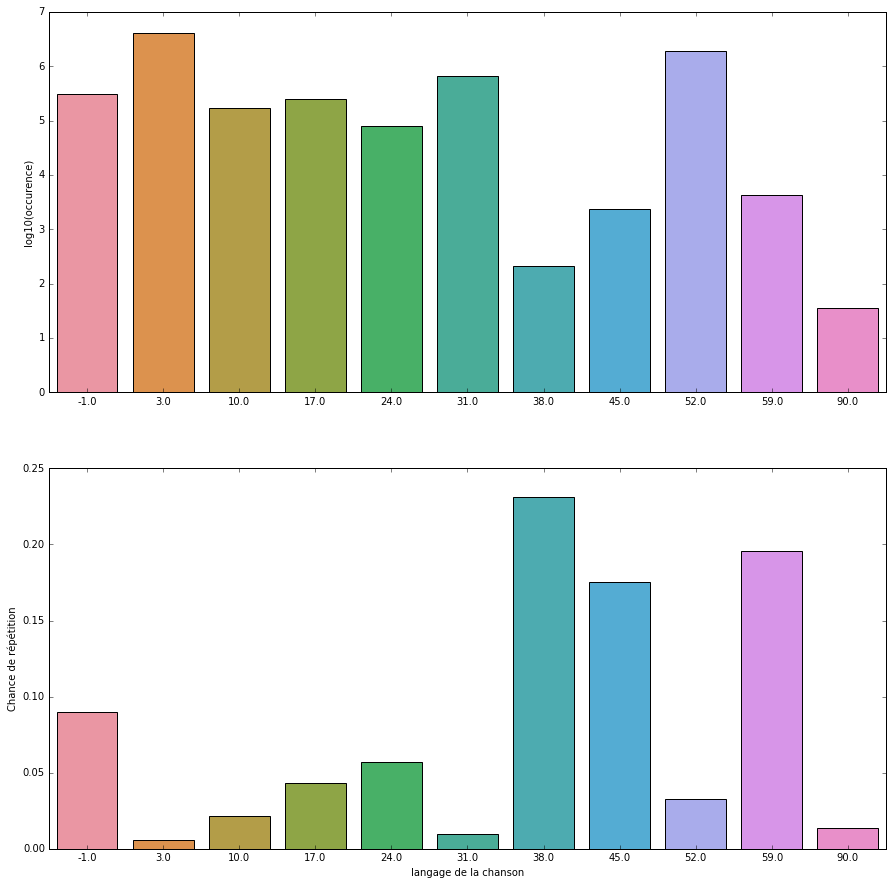

In [34]:
fig = plt.figure(figsize=(15, 15)) 

ax1 = plt.subplot(2,1,1)
sns.barplot(languages, np.log10(language_occurence)) # log en base 10 pour l'échelle
ax1.set_ylabel('log10(occurence)')

ax2 = plt.subplot(2,1,2)
sns.barplot(languages,language_chance_replay)
ax2.set_ylabel('Chance de répétition')
ax2.set_xlabel('langage de la chanson')

plt.show()


#### Etude de l'influence de la durée de la chanson

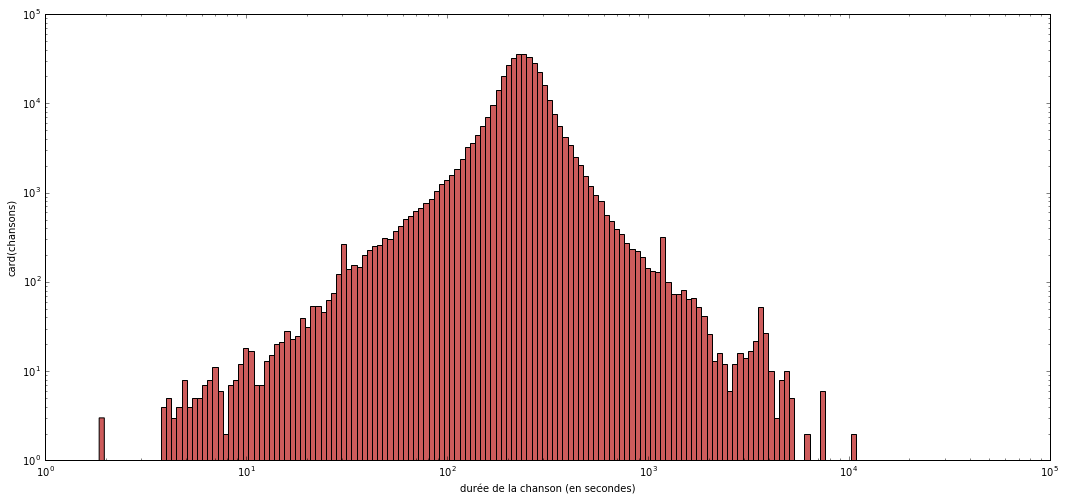

In [74]:
plt.figure(figsize=(18,8))
k = np.logspace(np.log10(min_song_length_sec)+1,np.log10(max_song_length_sec),150)

sns.distplot(song_data['song_length']/1000, bins=k, hist_kws={"alpha": 1}, kde=False, color='indianred')
plt.xlabel('durée de la chanson (en secondes)')
plt.ylabel('card(chansons)')
plt.yscale('log')
plt.xscale('log')
plt.show()